In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/alienpredator'
!ls "/content/drive/MyDrive/alienpredator"

bahan  latih  validasi


In [ ]:
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [ ]:
alien_dir = os.path.join(bahan_dir, 'alien/')
predator_dir = os.path.join(bahan_dir, 'predator/')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar alien:', len(os.listdir(alien_dir)))
print('Jumlah gambar predator:', len(os.listdir(predator_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar alien: 50
Jumlah gambar predator: 50


In [ ]:
train_alien = os.path.join(train_dir, 'alien/')
train_predator = os.path.join(train_dir, 'predator/')

validation_alien = os.path.join(validation_dir, 'alien/')
validation_predator = os.path.join(validation_dir, 'predator/')

In [ ]:
import random
import shutil
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

train_ratio = 0.9

source_00 = alien_dir
train_00 = train_alien
val_00 = validation_alien
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = predator_dir
train_01 = train_predator
val_01 = validation_predator
train_val_split(source_01, train_01, val_01, train_ratio)



In [ ]:
print('Jumlah data All alien:', len(os.listdir(alien_dir)))
print('Jumlah data Train alien:', len(os.listdir(train_alien)))
print('Jumlah data Val alien:', len(os.listdir(validation_alien)))

Jumlah data All alien: 50
Jumlah data Train alien: 45
Jumlah data Val alien: 5


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical'
)

Found 90 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi telah mencapai 99%!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dropout(0.3, seed=112),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dropout(0.5, seed=112),
        tf.keras.layers.Dense(2, activation= 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss= 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=7,
    epochs=25,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[callbacks]
)


Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 426ms/step - accuracy: 0.5222 - loss: 0.6964 - val_accuracy: 0.6000 - val_loss: 0.6874
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - accuracy: 0.6305 - loss: 0.6788 - val_accuracy: 0.7000 - val_loss: 0.6620
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.6337 - loss: 0.6421 - val_accuracy: 0.5000 - val_loss: 0.6836
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step - accuracy: 0.5832 - loss: 0.6930 - val_accuracy: 0.7000 - val_loss: 0.5698
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step - accuracy: 0.6843 - loss: 0.6438 - val_accuracy: 0.9000 - val_loss: 0.5432
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.7333 - loss: 0.5975 - val_accuracy: 0.7000 - val_loss: 0.6040
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - accuracy: 0.6552 - loss: 0.6398 - val_accuracy: 0.8000 - val_loss: 0.5167
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.7149 - loss: 0.6013 - val_accuracy: 0.6000 - val_loss:

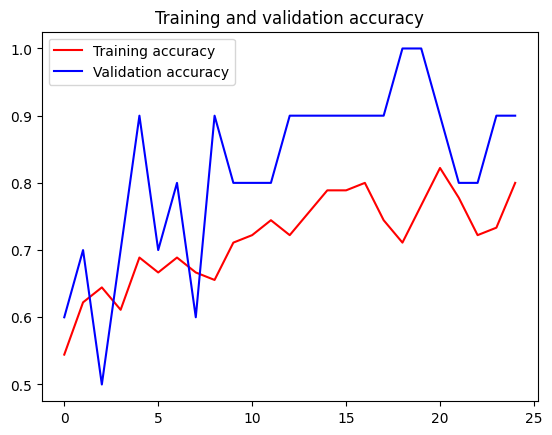

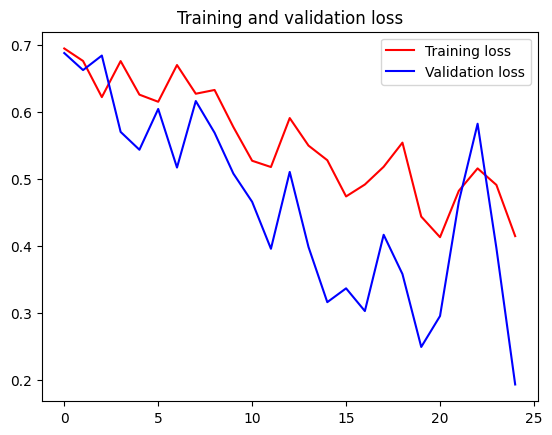

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc = 'best')
plt.show()

Saving 18.jpg to 18.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
18.jpg
This image belongs to class predator


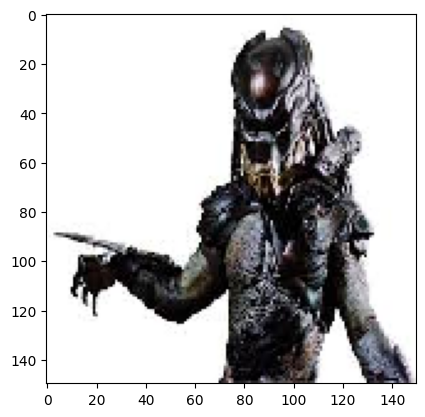

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(40):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving 35.jpg to 35 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
35 (1).jpg
This image belongs to class alien


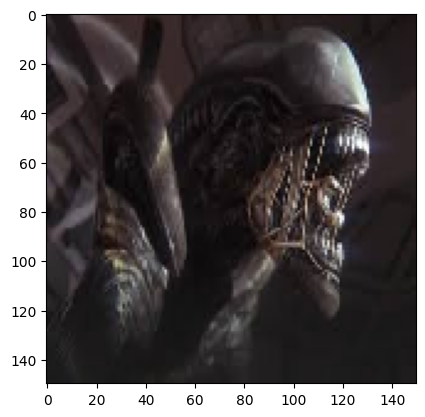

In [ ]:
 uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(40):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break